<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team44/blob/main/Semana4_Actividad5_Equipo44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tecnológico de Monterrey**

#Maestría en Inteligencia Artificial Aplicada

> Curso: Ciencia y Analítica de Datos

> Entregable : Semana 4 - Actividad 5

>Fecha: 11/10/2022

>Profesores:

>* Jobish Vallikavungal Devassia

>* Roberto Antonio Guevara González

> Integrantes:


*   LUIS ALFONSO SABANERO ESQUIVEL - A01273286
*   AQUILES YONATAN ARMENTA HERNANDEZ - A01793252


# Introducción 

Durante esta entrega tocaremos algunos temas como Reducción de la Dimensionalidad con PCA (Análisis de Componentes Principales.), Matriz de Correlación, Filtrado y Normalización del Dataset, es importante dejar claro en qué consisten y porque se emplearan.

Uno de los primeros pasos durante el desarrollo de esta entrega consistió en realizar un filtrado y limpieza de datos, existen datos que tienen inconsistencia en la regla de negocio y existen otros elementos que son de tipo categórico que por el momento descartamos, adicional se le asigno un nombre más descriptivo que nos permitiera identificarlas con mayor facilidad, para esto ocupamos Pandas.

Como siguiente paso se realizó una matriz de correlación, que nos indica los coeficientes de conexión que tenemos en nuestros datos, esto se logra mediante una utilidad de pandas llamada corr(), adicional mediante seaborn y matplotlib realizamos un headmap y un gráfico que nos permita ver gráficamente el comportamiento de nuestros datos correlacionados.

Cumpliendo los pasos anteriores realizamos una estandarización, esta se logra con StandardScaler de Skilearn que nos ayuda a estandarizar los valores de diferentes escalas que tenemos en nuestra muestra.

Por ultimo realizamos una reducción de dimensionalidad con PCA, esto se logra con Sklearn decomposition , en esencia este es el paso más importante para poder reducir la dimensionalidad de nuestros datos.





In [15]:
import pandas as pd # IMPORTACION DE PANDAS
import numpy as np # IMPORTACION DE NUMPY
import matplotlib.pyplot as plt # IMPORTACION DE MATPLOTLIB 
import seaborn as sns # IMPORTACION DE SEABORN
from sklearn.decomposition import PCA # ANALISIS DE COMPONENTES PRINCIPALES
from sklearn.preprocessing import StandardScaler # ESTANDARIZACION
from google.colab import data_table # IMPORTACION DE LIBRERIA PARA DAR FORMATO A LOS DATAFRAMES 
data_table.enable_dataframe_formatter() # ENABLE DATAFRAME FORMATTER

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df = pd.read_csv('sample_data/dataset.csv') #LECTURA DEL ARCHIVO
df.rename(columns={'X1':'MONTO', 'X2':'GENERO', 'X3':'GRADO_ESTUDIOS', 'X4':'ESTADO_CIVIL', 'X5':'EDAD', 'X6':'HP_SEP','X7':'HP_AGO','X8':'HP_JUL','X9':'HP_JUN','X10':'HP_MAY','X11':'HP_ABR','X12':'MP_SEP','X13':'MP_AGO','X14':'MP_JUL','X15':'MP_JUN', 'X16':'MP_MAY','X17':'MP_ABR','X18':'MPA_SEP', 'X19':'MPA_AGO','X20':'MPA_JUL','X21':'MPA_JUN','X22':'MPA_MAY','X23':'MPA_ABR'}, inplace = True) # RENOMBRAR COLUMNAS DEL DATAFRAME
data_table.DataTable(df.head())

,ID,MONTO,GENERO,GRADO_ESTUDIOS,ESTADO_CIVIL,EDAD,HP_SEP,HP_AGO,HP_JUL,HP_JUN,...,MP_JUN,MP_MAY,MP_ABR,MPA_SEP,MPA_AGO,MPA_JUL,MPA_JUN,MPA_MAY,MPA_ABR,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [18]:
dfTipos = pd.DataFrame(df.dtypes,columns={'TIPO'}) # OBTENER EL TIPO DE DATOS DEL DATAFRAME
data_table.DataTable(dfTipos)

,TIPO
ID,int64
MONTO,int64
GENERO,float64
GRADO_ESTUDIOS,float64
ESTADO_CIVIL,float64
EDAD,float64
HP_SEP,float64
HP_AGO,float64
HP_JUL,float64
HP_JUN,float64


In [19]:
copy_df = df.copy() # COPY DEL DATAFRAME PARA SU LIMPIEZA
copy_df.dropna(inplace=True) # LIMPEZA DE VALORES VACIOS
copy_df = copy_df.drop(labels=['ID','GENERO','GRADO_ESTUDIOS','ESTADO_CIVIL','HP_SEP','HP_AGO','HP_JUL','HP_JUN','HP_MAY','HP_ABR','Y'],axis=1).copy() # ELIMINACION DE COLUMNAS QUE TIENEN INCONSISTENCIA DE NEGOCIO Y LAS CATEGORICAS
data_table.DataTable(copy_df.head())

,MONTO,EDAD,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR,MPA_SEP,MPA_AGO,MPA_JUL,MPA_JUN,MPA_MAY,MPA_ABR
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


En esta seccion se muestra el BoxPlot de nuestros datos despues de eliminar los datos con inconsistencia de negocio y todas las variables categoricas.

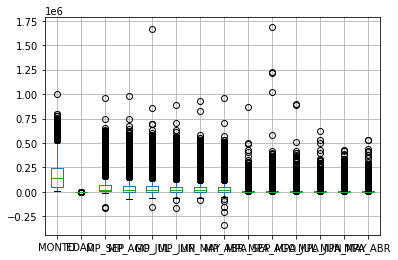

In [ ]:
copy_df.boxplot() #GENERAMOS BOXPLOT CON VARIABLES ORIGINALES

La matriz de correlacion nos permite identificar de una mejor manera el comportamiento de nuestra dataframe cuando le aplicamos la correlacion.

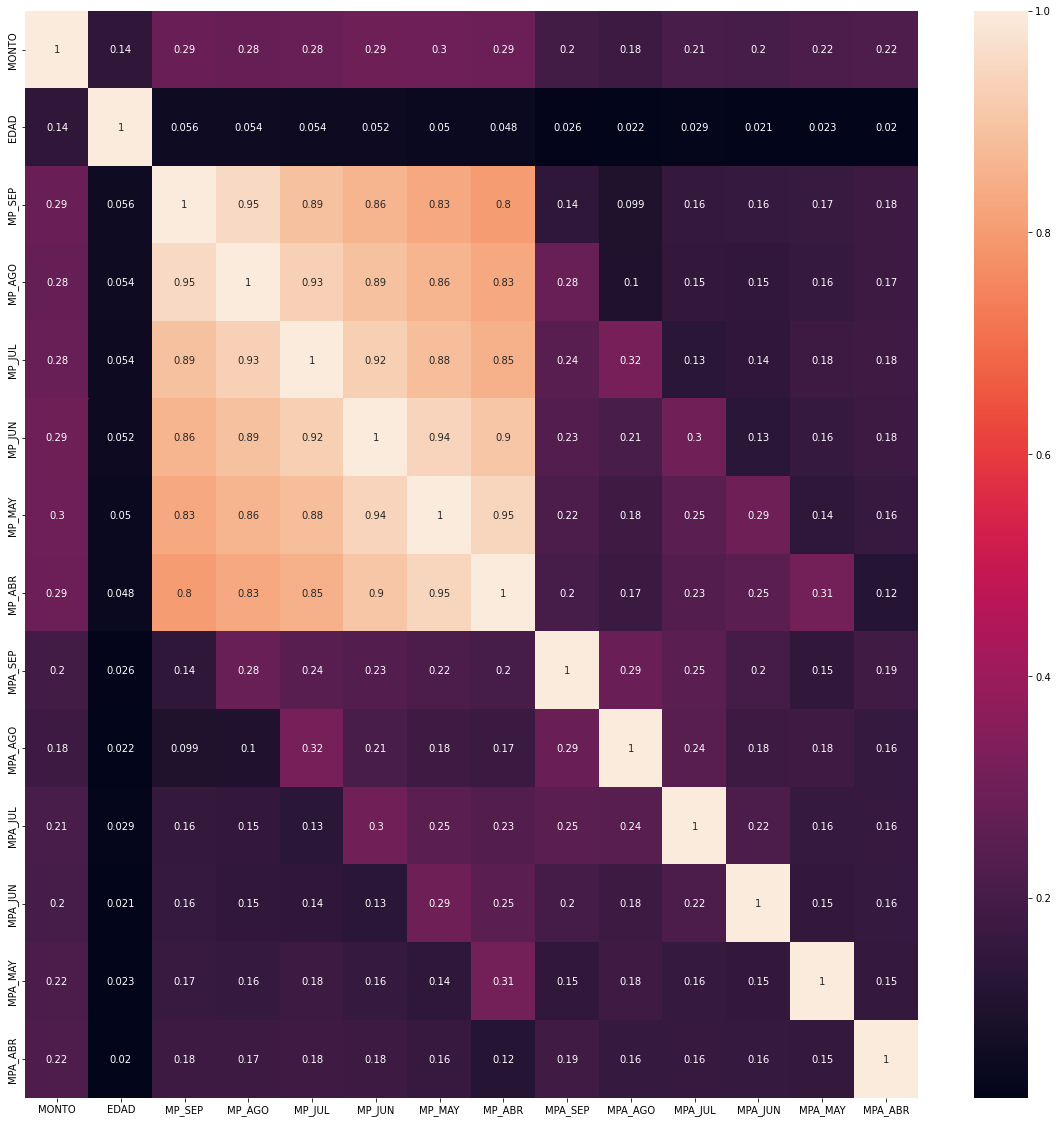

In [20]:
#GENERAMOS MATRIZ DE CORRELACIONES
corr=copy_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.title="Correlación"
plt.show()

Normalizacion del Dataset con StandardScaler()

In [21]:
scaler = StandardScaler() #INSTANCIAMOS OBJECTO SCALER
scaled = scaler.fit_transform(copy_df) #AJUSTAMOS Y TRANSFORMAMOS EL DATAFRAME
scaled_df = pd.DataFrame(scaled, columns=copy_df.columns) #FORMATEAMOS EL DF
data_table.DataTable(scaled_df.head())


,MONTO,EDAD,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR,MPA_SEP,MPA_AGO,MPA_JUL,MPA_JUN,MPA_MAY,MPA_ABR
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


Boxplot despues de Normalizar el Dataset con StandardScaler()

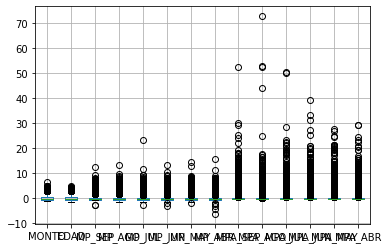

In [22]:
scaled_df.boxplot() #BOXPLOT DATOS NORMALIZADOS

Reduccion de Dimensionalidad con PCA del Dataset Normalizado con StandardScaler.

In [23]:
pca = PCA() #INSTANCIAMOS OBJETO PCA
pca_fit =pca.fit_transform(scaled_df) #GENERAMOS MODELO PCA

In [24]:
#PARA REVISAR Y COMPARAR VARIANZAS
pcsSummary_df = pd.DataFrame({ 
    '% varianza explicada': np.round(pca.explained_variance_ratio_,4) * 100,
    '% varianza acumulada': np.cumsum(pca.explained_variance_ratio_) * 100
    })


Obtenemos la proporción acumulada de la varianza.

In [25]:
#FORMATEAMOS PARA MEJOR LECTURA
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
data_table.DataTable(pcsSummary_df)

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


Explicacion de la varianza acomulada vs explicada.

In [26]:
#VERIFACMOS QUE NO SE PIERDA INFORMACION
pcs_df = pd.DataFrame(pca_fit, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [27]:
data_table.DataTable(pcsSummary_df) #FORMATEAMOS DATAFRAME

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [28]:
#ANALISIS DE VARIANZA CON VARIABLES ORIGINALES
total_var =scaled_df.var().sum()
data_table.DataTable(pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) * 100
}))

,Porcentaje Varianza,Porcentaje Varianza Acumulado
MONTO,7.142857,7.142857
EDAD,7.142857,14.285714
MP_SEP,7.142857,21.428571
MP_AGO,7.142857,28.571429
MP_JUL,7.142857,35.714286
MP_JUN,7.142857,42.857143
MP_MAY,7.142857,50.000000
MP_ABR,7.142857,57.142857
MPA_SEP,7.142857,64.285714
MPA_AGO,7.142857,71.428571


Revision de la magnitud de las componentes respecto a las variables originales

In [29]:
#Revision de pesos de los componentes
comps_df = pd.DataFrame(
pca.components_.round(4),
columns = pcs_df.columns,
index = scaled_df.columns)
data_table.DataTable(comps_df.iloc[:,:7])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
MONTO,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885
EDAD,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059
MP_SEP,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339
MP_AGO,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396
MP_JUL,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068
MP_JUN,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993
MP_MAY,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076
MP_ABR,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498
MPA_SEP,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237
MPA_AGO,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200


In [ ]:
#Seleccionamos los 7 componentes más relevantes
comps_df.iloc[:,:7].idxmax()

PC1       EDAD
PC2     MP_AGO
PC3    MPA_AGO
PC4    MPA_ABR
PC5    MPA_JUN
PC6      MONTO
PC7    MPA_MAY
dtype: object

BoxPlot despues de aplicar PCA y varianza de los componentes.

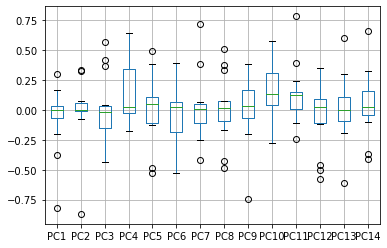

In [ ]:
comps_df.boxplot() #Bloxplot despues del PCA

# **RESPUESTAS**

1. ¿Cuál es el número de componentes mínimo y por qué?

> Determinamos que el número de componentes mínimo después de aplicar PCA y realizar un análisis de la varianza de componentes, concluimos que el número mínimo es 6 donde tenemos a:


>*   PC1 - EDAD
>*   PC2 - MP_AGO
>*   PC3 - MPA_AGO
>*   PC4 - MPA_ABR
>*   PC5 - MPA_JUN
>*   PC6 - MONTO

> Estos componentes corresponden al 86.72% de varianza de la muestra, sin embargo, podemos también considerar usar un séptimo componente que juntaría el 91.90% de la varianza. Sería conveniente definir una regla de negocio para este criterio.



2. ¿Cuál es la variación de los datos que representan esos componentes?

> > Usando los 6 compontes estaríamos representando el 86.72% de varianza

3. ¿Cuál es la pérdida de información después de realizar PCA?

> Después de seleccionar los componentes, estimamos que tendríamos el 13.28 % de perdida de información..

4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

> La que tiene mayor importancia es PC1 - EDAD y la que tiene menor importancia PC14 - MP_JUL 

* PC1	42.28
* PC2	12.26
* PC3	7.46
* PC4	6.61
* PC5	6.3100000000000005
* PC6	6.23
* PC7	5.57
* PC8	5.19
* PC9	5.050000000000001
* PC10	1.8900000000000001
* PC11	0.51
* PC12	0.29
* PC13	0.18
* PC14	0.16999999999999998



5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

> Se recomienda usar el PCA cuando se requiere reducir la cantidad de información que tiene un dataSet, dando como resultado un dataset más pequeño con casi la misma calidad de información que el dataset original.
De esta manera el modelo que se generaría por medio de un Algoritmo de machine learning, computacionalmente no sería complejo y arrojaría un resultado optimo. También es importante considerar que ese proceso requiere únicamente datos continuos es decir no es capaz de trabajar con datos categóricos, por lo que no siempre podría ser la mejor alternativa.


# Referencias Bibliograficas

* (S/f). Datacamp.com. Recuperado el 12 de octubre de 2022, de https://www.datacamp.com/tutorial/principal-component-analysis-in-python

* Hall, M. (2015, abril 15). Variance vs. Covariance: What’s the difference? Investopedia. https://www.investopedia.com/ask/answers/041515/what-difference-between-variance-and-covariance.asp